# Problem Statement:
Backorders are unavoidable, but by anticipating which things will be backordered,
planning can be streamlined at several levels, preventing unexpected strain on
production, logistics, and transportation. ERP systems generate a lot of data (mainly
structured) and also contain a lot of historical data; if this data can be properly utilized, a
predictive model to forecast backorders and plan accordingly can be constructed.
Based on past data from inventories, supply chain, and sales, classify the products as
going into backorder (Yes or No).

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
df=pd.read_csv(r"C:\Users\akshay\Downloads\Kaggle_Training_Dataset_v2.csv")

C:\Users\akshay\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## feature description 
* sku - Random product(sku) code 
* national_inv - Current inventory level of that sku
* lead_time - Transit time for product(if available at source)
* in_transit_qty - Quantity in transit from source
* forecast_x_month - Forecast sales for the net 3, 6, 9 months
* sales_x_month - Sales quantity for the prior 1, 3, 6, 9 months
* min_bank - Minimum recommended amount to stock
* potential_issue - Indictor variable noting potential issue with item
* pieces_past_due - Parts overdue from source
* perf_x_months_avg - Source performance in the last 6 and 12 months
* local_bo_qty - Amount of stock orders overdue
* deck_risk – Part risk flag
* oe_constraint – Part risk flag
* ppap_risk – Part risk flag
* stop_auto_buy – Part risk flag
* rev_stop – Part risk flag
* went_on_backorder - Product went on backorder

In [5]:
df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


In [6]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [7]:
df.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.nunique()

sku                  1687861
national_inv           14969
lead_time                 32
in_transit_qty          5230
forecast_3_month        7825
forecast_6_month       11114
forecast_9_month       13662
sales_1_month           5764
sales_3_month          10495
sales_6_month          14818
sales_9_month          18341
min_bank                5568
potential_issue            2
pieces_past_due          826
perf_6_month_avg         102
perf_12_month_avg        102
local_bo_qty             654
deck_risk                  2
oe_constraint              2
ppap_risk                  2
stop_auto_buy              2
rev_stop                   2
went_on_backorder          2
dtype: int64

In [9]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [10]:
data_type=list(map(lambda X:str(X).replace("dtype('","").replace("')",""),df.dtypes.values))

In [11]:
column=df.columns

In [12]:
dict(zip(column,data_type))

{'sku': 'object',
 'national_inv': 'float64',
 'lead_time': 'float64',
 'in_transit_qty': 'float64',
 'forecast_3_month': 'float64',
 'forecast_6_month': 'float64',
 'forecast_9_month': 'float64',
 'sales_1_month': 'float64',
 'sales_3_month': 'float64',
 'sales_6_month': 'float64',
 'sales_9_month': 'float64',
 'min_bank': 'float64',
 'potential_issue': 'object',
 'pieces_past_due': 'float64',
 'perf_6_month_avg': 'float64',
 'perf_12_month_avg': 'float64',
 'local_bo_qty': 'float64',
 'deck_risk': 'object',
 'oe_constraint': 'object',
 'ppap_risk': 'object',
 'stop_auto_buy': 'object',
 'rev_stop': 'object',
 'went_on_backorder': 'object'}

In [8]:
df.describe(include='all')

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1687861.0,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,...,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1687860,1687860,1687860,1687860,1687860,1687860
unique,1687861.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,2,2,2,2,2
top,1026827.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,No,No,Yes,No,No
freq,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1300377,1687615,1484026,1626774,1687129,1676567
mean,NaN,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,...,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,...,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,...,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,...,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#mean is > 75 th percentile so it is right skewed
# max value is high compared to 75th percentile so there are outliers

In [10]:
medians=df.median()

C:\Users\akshay\AppData\Local\Temp/ipykernel_32944/2918878421.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medians=df.median()


In [11]:
medians

national_inv         15.00
lead_time             8.00
in_transit_qty        0.00
forecast_3_month      0.00
forecast_6_month      0.00
forecast_9_month      0.00
sales_1_month         0.00
sales_3_month         1.00
sales_6_month         2.00
sales_9_month         4.00
min_bank              0.00
pieces_past_due       0.00
perf_6_month_avg      0.82
perf_12_month_avg     0.81
local_bo_qty          0.00
dtype: float64

In [12]:
for col in df.columns:
    mode = df[col].mode()
    print(f"Mode of {col}: {mode.to_string(index=False)}")

C:\Users\akshay\anaconda3\lib\site-packages\pandas\core\algorithms.py:969: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  warn(f"Unable to sort modes: {err}")
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Mode of in_transit_qty: 0.0
Mode of forecast_3_month: 0.0
Mode of forecast_6_month: 0.0
Mode of forecast_9_month: 0.0
Mode of sales_1_month: 0.0
Mode of sales_3_month: 0.0
Mode of sales_6_month: 0.0
Mode of sales_9_month: 0.0
Mode of min_bank: 0.0
Mode of potential_issue: No
Mode of pieces_past_due: 0.0
Mode of perf_6_month_avg: 0.99
Mode of perf_12_month_avg: 0.99
Mode of local_bo_qty: 0.0
Mode of deck_risk: No
Mode of oe_constraint: No
Mode of ppap_risk: No
Mode of stop_auto_buy: Yes
Mode of rev_stop: No
Mode of went_on_backorder: No


# missing values

In [13]:
df.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [14]:
# lead time having lot of null values
# we have null values for other feature which is in the last row

<AxesSubplot:>

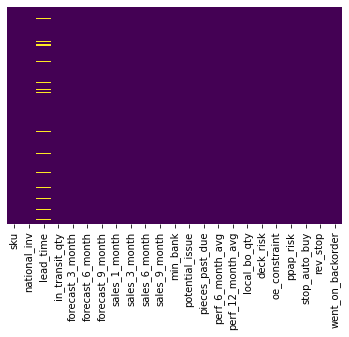

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
for col in df.select_dtypes(include=['float']):
    skewness=df[col].skew()
    kurtosis=df[col].kurt()
    print(f"{col} has skewness and kurtosis:{skewness,kurtosis}")

national_inv has skewness and kurtosis:(340.2858003326191, 131276.59257932162)
lead_time has skewness and kurtosis:(4.556295427885091, 26.23722750420738)
in_transit_qty has skewness and kurtosis:(166.18340424761558, 39606.10405290813)
forecast_3_month has skewness and kurtosis:(138.96832519579834, 25637.55029993227)
forecast_6_month has skewness and kurtosis:(138.96142721254265, 25189.903788272073)
forecast_9_month has skewness and kurtosis:(143.298874740098, 27048.452312581445)
sales_1_month has skewness and kurtosis:(196.1199898556541, 53855.92556025887)
sales_3_month has skewness and kurtosis:(141.2863795444832, 24198.860650933373)
sales_6_month has skewness and kurtosis:(139.17671201086372, 24305.44501338931)
sales_9_month has skewness and kurtosis:(135.05419147168155, 22844.80574661239)
min_bank has skewness and kurtosis:(131.21264893012795, 23549.240091008585)
pieces_past_due has skewness and kurtosis:(412.39190039252696, 207663.2258415861)
perf_6_month_avg has skewness and kurto

In [17]:
# from above values it is clear that numerical features are extremely right skewed and have very large no of outliers

In [18]:
df.set_index('sku',inplace=True)

In [19]:
df

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
sku,,,,,,,,,,,,,,,,,,,,,
1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,...,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
encoder=LabelEncoder()

In [22]:
df['went_on_backorder']=encoder.fit_transform(df['went_on_backorder'])

In [23]:
df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
sku,,,,,,,,,,,,,,,,,,,,,
1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,0
1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,0
1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,0
1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,0
1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,0


In [24]:
X=df.drop(labels=['went_on_backorder'],axis=1)

In [25]:
y=df['went_on_backorder']

In [26]:
X

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
sku,,,,,,,,,,,,,,,,,,,,,
1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No
1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No
1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No
1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No
1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,...,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No
1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,...,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No
1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,...,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No


In [27]:
y

sku
1026827           0
1043384           0
1043696           0
1043852           0
1044048           0
                 ..
1373987           0
1524346           1
1439563           0
1502009           0
(1687860 rows)    2
Name: went_on_backorder, Length: 1687861, dtype: int32

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1687861 entries, 1026827 to (1687860 rows)
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   national_inv       1687860 non-null  float64
 1   lead_time          1586967 non-null  float64
 2   in_transit_qty     1687860 non-null  float64
 3   forecast_3_month   1687860 non-null  float64
 4   forecast_6_month   1687860 non-null  float64
 5   forecast_9_month   1687860 non-null  float64
 6   sales_1_month      1687860 non-null  float64
 7   sales_3_month      1687860 non-null  float64
 8   sales_6_month      1687860 non-null  float64
 9   sales_9_month      1687860 non-null  float64
 10  min_bank           1687860 non-null  float64
 11  potential_issue    1687860 non-null  object 
 12  pieces_past_due    1687860 non-null  float64
 13  perf_6_month_avg   1687860 non-null  float64
 14  perf_12_month_avg  1687860 non-null  float64
 15  local_bo_qty       16878

In [32]:
cat_col=['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop']

In [33]:
num_col=['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty']

In [34]:
num_pipeline=Pipeline(
        steps=[
            ('imputer',SimpleImputer(strategy='median')),
            ('scaler',StandardScaler())
        ]
)

cat_pipeline=Pipeline(
        steps=[
            ('imputer',SimpleImputer(strategy='most_frequent')),
            ('encoder',OneHotEncoder())
        ]
)

In [35]:
preprocessor=ColumnTransformer([
      ('num_pipeline',num_pipeline,num_col),
      ('cat_pipeline',cat_pipeline,cat_col)
])

In [37]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [39]:
models={
    'random_forest':RandomForestClassifier(),
    'logistic_regression':LogisticRegression(),  #oob_score
    'decision_tree':DecisionTreeClassifier()
}

In [40]:
list(models.values())

[RandomForestClassifier(), LogisticRegression(), DecisionTreeClassifier()]

In [41]:
list(models.keys())

['random_forest', 'logistic_regression', 'decision_tree']

In [42]:
len(models)

3

In [53]:
from sklearn.metrics import accuracy_score

def evaluate_model(X_train,y_train,X_test,y_test,models):
    report={}
    for i in range(len(models)):
        model=list(models.values())[i]
        model.fit(X_train,y_train)
        print(model.score(X_train,y_train))
        y_pred=model.predict(X_test)
        accuracy=round(accuracy_score(y_test,y_pred)*100,2)
        report[list(models.keys())[i]]=accuracy
        
    return report

In [54]:
evaluate_model(X_train,y_train,X_test,y_test,models)

0.9996038940264173


C:\Users\akshay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9933745351256282
0.9996055867869881


{'random_forest': 99.46, 'logistic_regression': 99.31, 'decision_tree': 99.17}

In [45]:
params={
    'n_estimators':[50,100,200],
    'criterion':['gini','entropy'],
    'max_depth':[3,5,10]
}

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
model=RandomForestClassifier(oob_score=True)

In [51]:
cv=RandomizedSearchCV(model,param_distributions=params,scoring='accuracy',cv=5,verbose=3)

In [52]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=10, n_estimators=50;, score=0.993 total time= 5.8min
[CV 2/5] END criterion=gini, max_depth=10, n_estimators=50;, score=0.993 total time= 5.0min
[CV 3/5] END criterion=gini, max_depth=10, n_estimators=50;, score=0.993 total time= 4.7min
[CV 4/5] END criterion=gini, max_depth=10, n_estimators=50;, score=0.993 total time= 4.5min
[CV 5/5] END criterion=gini, max_depth=10, n_estimators=50;, score=0.993 total time= 4.4min
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=200;, score=0.993 total time= 7.3min
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=200;, score=0.993 total time= 7.5min
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=200;, score=0.993 total time=17.8min
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=200;, score=0.993 total time=20.4min
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=200;, score=0.993 total time= 6.0min
[CV 1/5] END criter

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(oob_score=True),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   scoring='accuracy', verbose=3)

In [55]:
cv.best_params_

{'n_estimators': 50, 'max_depth': 10, 'criterion': 'gini'}

In [56]:
bestmodel=RandomForestClassifier(n_estimators= 50, max_depth=10, criterion ='gini')

In [57]:
bestmodel.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [58]:
y_pred=bestmodel.predict(X_test)

In [59]:
accuracy_score(y_test,y_pred)

0.9931629535566663

In [60]:
bestmodel.score(X_train,y_train)

0.9934439383090338

# Pickle file


In [62]:
import pickle

In [63]:
# save the model as a pickle file
filename = 'backorder_rf_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [64]:
# load the saved model
loaded_model = pickle.load(open(filename, 'rb'))


In [67]:
loaded_model.fit(X_train,y_train)

RandomForestClassifier(oob_score=True)

In [69]:
y_predicted=loaded_model.predict(X_test)

array([ True,  True,  True, ...,  True,  True,  True])

In [73]:
if y_predicted.all()==y_pred.all():
    print("all true")
else:
    print("some are false")

all true
